In [1]:
import imp
import GPy
import numpy as np
import read_data as rd
import plot_pareto as pp


# load data from CSV files

In [6]:
imp.reload(rd)
# SNW data

X_full, X, Y = rd.read_from_csv("noc")
# for i in range(len(Y)):
#     Y[i][0] = Y[i][0]*(-1)

# NOC data

# X_full, X, Y = rd.read_from_csv("noc")
# for i in range(len(Y)):
#     Y[i][0] = Y[i][0]*(-1)
    
# LLVM data

# X_full, X, Y = rd.read_from_csv("llvm")
# Y[:, [0, 1]] = Y[:, [1, 0]]
# for i in range(len(Y)):
#     Y[i][0] = Y[i][0]*(-1)
print(X_full.shape, X.shape, Y.shape)

(259, 6) (259, 4) (259, 2)


# try GP regression

In [7]:
kernel = GPy.kern.RBF(input_dim=3, variance=1., lengthscale=1.)

In [8]:
y1 = Y[:, 0][:,np.newaxis]

print(X, y1)

[[  3.   1.   4.   1.]
 [  3.   1.   1.   1.]
 [  3.   1.   2. 100.]
 ...
 [  4.   0.   1.   2.]
 [  4.   0.   2.   2.]
 [  4.   0.   3.   2.]] [[-7.83510298]
 [-7.83683305]
 [-9.96578428]
 [-7.95823949]
 [-7.95823949]
 [-7.95823949]
 [-7.95823949]
 [-7.07588556]
 [-7.07588556]
 [-7.07588556]
 [-7.07588556]
 [-8.900257  ]
 [-8.900257  ]
 [-9.96578428]
 [-8.900257  ]
 [-8.900257  ]
 [-6.95193742]
 [-6.9502351 ]
 [-6.95193742]
 [-6.95193742]
 [-7.57898399]
 [-7.57899908]
 [-7.57898399]
 [-7.57898399]
 [-7.88193375]
 [-9.76685186]
 [-9.76685186]
 [-9.76685186]
 [-9.76685186]
 [-7.03566789]
 [-7.03577785]
 [-7.03566789]
 [-7.03566789]
 [-8.0591822 ]
 [-8.0591822 ]
 [-7.88296701]
 [-8.0591822 ]
 [-8.0591822 ]
 [-7.2638701 ]
 [-7.26390765]
 [-7.2638701 ]
 [-7.2638701 ]
 [-8.94727165]
 [-8.94727165]
 [-8.94727165]
 [-8.94727165]
 [-7.88193375]
 [-6.41540376]
 [-6.41540376]
 [-6.41540376]
 [-6.41540376]
 [-7.25664273]
 [-7.25664273]
 [-7.25664273]
 [-7.25664273]
 [-9.70237011]
 [-9.70237011]
 

In [79]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0002   3.008847e+00   2.956402e-12 
Runtime:     00s00
Optimization status: Converged



# try GP's predict function

In [11]:
for i in range(35):
    print(m.predict_noiseless(np.array([X[i]]))[0], m.predict_noiseless(np.array([X[i]]))[0] == m.predict(np.array([X[i]]))[0], m.predict_noiseless(np.array([X[i]]))[1], m.predict(np.array([X[i]]))[1], Y[i])

[[-7.83502308]] [[ True]] [[5.49406423e-08]] [[1.0945381e-07]] [-7.83510298  4.33936051]
[[-7.83676971]] [[ True]] [[5.58364945e-08]] [[1.10349663e-07]] [-7.83683305  4.30919382]
[[-9.96576559]] [[ True]] [[5.3631652e-08]] [[1.0814482e-07]] [-9.96578428  5.06615445]
[[-7.95807969]] [[ True]] [[4.97825567e-08]] [[1.04295725e-07]] [-7.95823949  5.09653608]
[[-7.95798528]] [[ True]] [[5.01675004e-08]] [[1.04680669e-07]] [-7.95823949  5.09653608]
[[-7.95805318]] [[ True]] [[3.84292207e-08]] [[9.29423889e-08]] [-7.95823949  5.09653608]
[[-7.95804934]] [[ True]] [[3.67863322e-08]] [[9.12995004e-08]] [-7.95823949  5.09653608]
[[-7.07589031]] [[ True]] [[4.03980494e-08]] [[9.49112176e-08]] [-7.07588556  5.04157767]
[[-7.07583904]] [[ True]] [[4.16763442e-08]] [[9.61895124e-08]] [-7.07588556  5.04157406]
[[-7.07583599]] [[ True]] [[3.0506726e-08]] [[8.50198942e-08]] [-7.07588556  5.04157767]
[[-7.07579841]] [[ True]] [[3.00306056e-08]] [[8.45437738e-08]] [-7.07588556  5.04157767]
[[-8.90014027]

# try when there is only one point, do the GP regression

In [11]:


kernel = GPy.kern.RBF(input_dim=3, variance=1, lengthscale=10.)

print(X[:5], "\n",y1[:5])
m = GPy.models.GPRegression(X[:5], y1[:5], kernel)
m.optimize(messages=False)
for i in range(5):
    print(i, m.predict(np.array([X[i]])))

[[  3.   1.   4.   1.]
 [  3.   1.   1.   1.]
 [  3.   1.   2. 100.]
 [  4.   0.   4.  20.]
 [  4.   0.   1.  20.]] 
 [[-7.83510298]
 [-7.83683305]
 [-9.96578428]
 [-7.95823949]
 [-7.95823949]]
0 (array([[-8.29013377]]), array([[1.03113942]]))
1 (array([[-8.29017324]]), array([[1.03113137]]))
2 (array([[-8.2901617]]), array([[1.03110721]]))
3 (array([[-8.29011137]]), array([[1.03114479]]))
4 (array([[-8.29015083]]), array([[1.03113674]]))


In [102]:
a = np.array([[0., 36., 1.],
 [3., 8., 4.]])
b = np.array([[-10.65910396],
 [-10.87728413]])

# plot the dataset, find the Pareto front and plot it

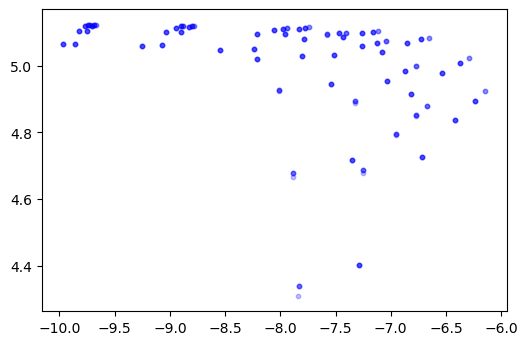

<class 'numpy.ndarray'>


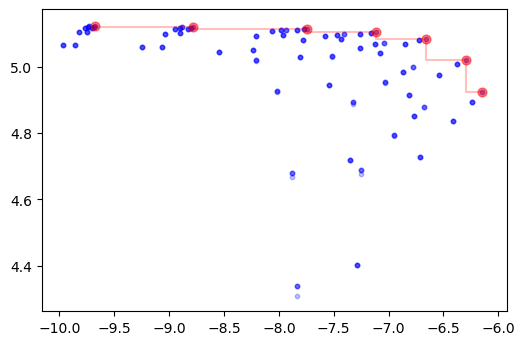

In [3]:
imp.reload(pp)
# SNW data
pp.plot_points((Y[:, 0]), (Y[:, 1]))


# LLVM data (looks different from the pic in the paper)


# noc data
# pp.plot_points((Y[:, 0]), (Y[:, 1]))

imp.reload(pp)
print(type(Y))
Y_pareto = pp.find_pareto(Y)

pp.plot_points_with_pareto((Y[:, 0]), (Y[:, 1]), (Y_pareto[:, 0]),  (Y_pareto[:, 1]))

In [44]:
# print(X, y1)
import random

kernel = GPy.kern.RBF(input_dim=4, variance=1, lengthscale=1.)
pre = GPy.models.GPRegression(X, y1, kernel)
pre.optimize(messages=True)


index = random.randint(0, len(X))
point = X[index]
print(point, y1[index])
m = GPy.models.GPRegression(np.array([point]), np.array([y1[index]]), kernel)
# m.optimize(messages=True)

for point in X:
    print(point)
    print(m.predict(np.array([point])))

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s03  0005   2.983567e+02   8.776394e+03 
    00s09  0014  -5.695899e+02   1.125795e+02 
    00s15  0023  -8.081927e+02   1.259117e+00 
    00s19  0029  -8.115525e+02   3.001982e+01 
    00s48  0088  -8.166912e+02   5.109362e-05 
Runtime:     00s48
Optimization status: Errorb'ABNORMAL_TERMINATION_IN_LNSRCH'

[ 6.  1.  4. 50.] [-8.90271879]
[3. 1. 4. 1.]
(array([[-2.38767671e-05]]), array([[694.81512838]]))
[3. 1. 1. 1.]
(array([[-2.27599473e-05]]), array([[694.81512838]]))
[  3.   1.   2. 100.]
(array([[-1.38000987e-05]]), array([[694.81512838]]))
[ 4.  0.  4. 20.]
(array([[-0.07193033]]), array([[694.76977099]]))
[ 4.  0.  1. 20.]
(array([[-0.06856584]]), array([[694.77391488]]))
[ 4.  0.  2. 20.]
(array([[-0.07041509]]), array([[694.77166181]]))
[ 4.  0.  3. 20.]
(array([[-0.07154849]]), array([[694.77025127]]))
[4. 0. 4. 5.]
(array([[-0.00018046]]), array([[694.81512809]]))
[4. 0. 1. 5.]

(array([[-0.00018046]]), array([[694.81512809]]))
[  3.   1.   4. 100.]
(array([[-1.40970596e-05]]), array([[694.81512838]]))
[ 4.  1.  4. 50.]
(array([[-8.70263586]]), array([[30.88010521]]))
[ 4.  1.  1. 50.]
(array([[-8.29557588]]), array([[91.53775713]]))
[ 4.  1.  2. 50.]
(array([[-8.51931093]]), array([[58.55766052]]))
[ 4.  1.  3. 50.]
(array([[-8.65643806]]), array([[37.91037083]]))
[4. 0. 4. 1.]
(array([[-2.43905653e-05]]), array([[694.81512837]]))
[4. 0. 1. 1.]
(array([[-2.32497129e-05]]), array([[694.81512838]]))
[4. 0. 2. 1.]
(array([[-2.38767671e-05]]), array([[694.81512838]]))
[4. 0. 3. 1.]
(array([[-2.42610884e-05]]), array([[694.81512837]]))
[ 4.  0.  4. 10.]
(array([[-0.00173301]]), array([[694.81510205]]))
[ 4.  0.  1. 10.]
(array([[-0.00165195]]), array([[694.81510446]]))
[  3.   1.   1. 100.]
(array([[-1.3437679e-05]]), array([[694.81512838]]))
[ 4.  0.  2. 10.]
(array([[-0.00169651]]), array([[694.81510315]]))
[ 4.  0.  3. 10.]
(array([[-0.00172381]]), array([[694.